## Data Dictionary 

In [1]:
# Please import kid.csv

Here are the variables that magazine reseller has on each customer from third-party sources:
Household Income (Income; rounded to the nearest $1,000.00)

Gender (IsFemale = 1 if the person is female, 0 otherwise)

Marital Status (IsMarried = 1 if married, 0 otherwise)

College Educated (HasCollege = 1 if has one or more years of college education, 0 otherwise)

Employed in a Profession (IsProfessional = 1 if employed in a profession, 0 otherwise)

Retired (IsRetired = 1 if retired, 0 otherwise)

Not employed (Unemployed = 1 if not employed, 0 otherwise)

Length of Residency in Current City (ResLength; in years)

Dual Income if Married (Dual = 1 if dual income, 0 otherwise)

Children (Minors = 1 if children under 18 are in the household, 0 otherwise)

Home ownership (Own = 1 if own residence, 0 otherwise)

Resident type (House = 1 if the residence is a single-family house, 0 otherwise)

Race (White = 1 if the race is white, 0 otherwise)

Language (English = 1 is the primary language in the household is English, 0 otherwise)

With this dataset, we will be building a binary classification model which will take above inputs as features and predict if the customer will buy the magazine or not. At last, we’ll evaluate our model using the confusion matrix.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('./kid.csv')

In [4]:
df.head()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [5]:
df.drop('Obs No.', axis=1, inplace=True)

In [6]:
# Modify column names 
col = list(df.columns)
col = [i.lower() for i in col]
col = [i.replace(' ', '_') for i in col]
df.columns = col

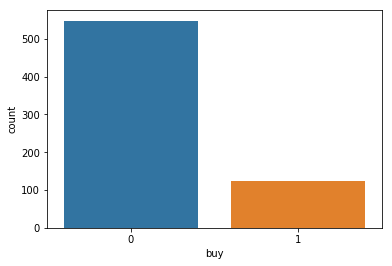

In [7]:
# Plot a countplot on how many people have bought the magazine
sns.countplot(x = 'buy' , data=df);

In [8]:
# Check for nulls
df.isnull().sum()

buy                 0
income              0
is_female           0
is_married          0
has_college         0
is_professional     0
is_retired          0
unemployed          0
residence_length    0
dual_income         0
minors              0
own                 0
house               0
white               0
english             0
prev_child_mag      0
prev_parent_mag     0
dtype: int64

Nice! No null value in the dataset!

In [9]:
# Checking the need for variable transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 17 columns):
buy                 673 non-null int64
income              673 non-null int64
is_female           673 non-null int64
is_married          673 non-null int64
has_college         673 non-null int64
is_professional     673 non-null int64
is_retired          673 non-null int64
unemployed          673 non-null int64
residence_length    673 non-null int64
dual_income         673 non-null int64
minors              673 non-null int64
own                 673 non-null int64
house               673 non-null int64
white               673 non-null int64
english             673 non-null int64
prev_child_mag      673 non-null int64
prev_parent_mag     673 non-null int64
dtypes: int64(17)
memory usage: 89.5 KB


All variables are intergers. All variable are categorical except Income and residence. So there is no need for creating any dummy variables.

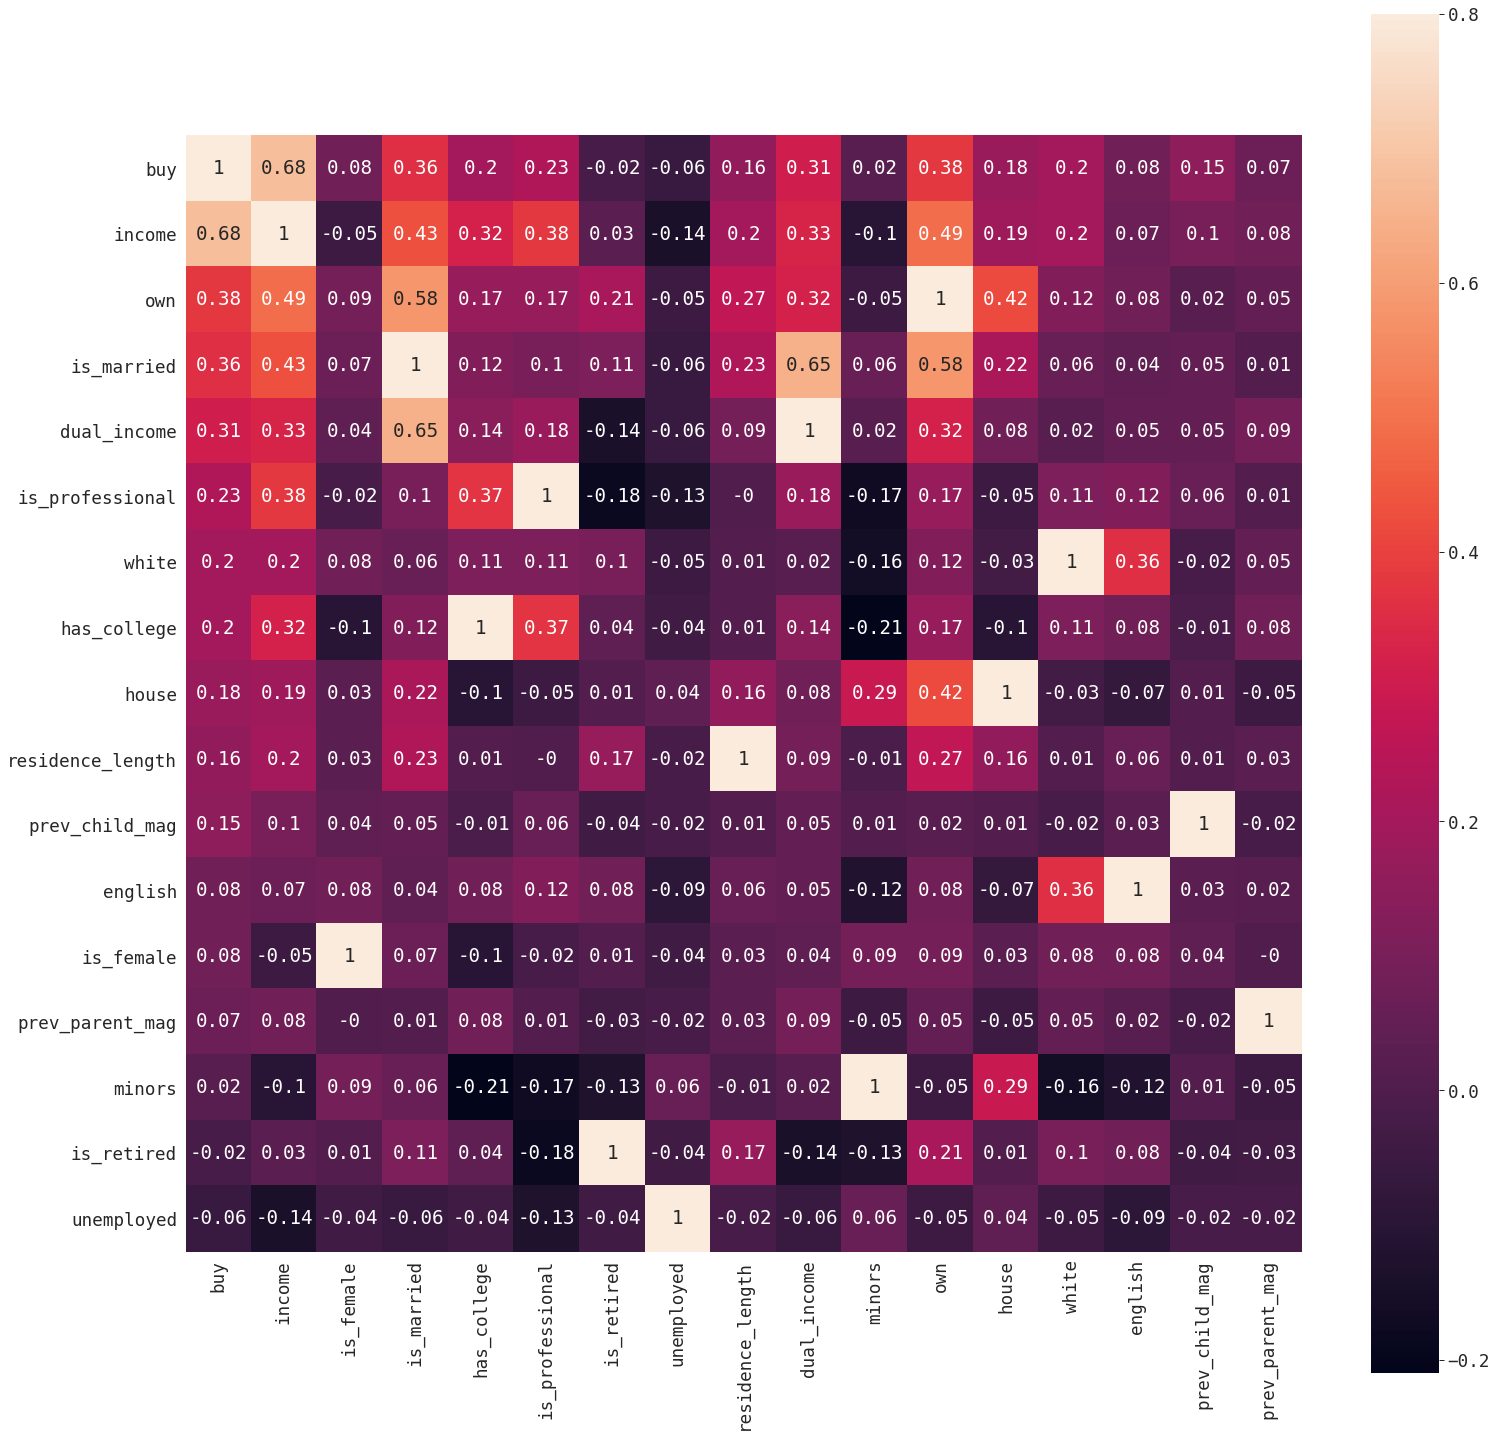

In [10]:
df_corr = df.corr().sort_values('buy', ascending=False).round(2)
sns.set(context="paper", font="monospace", font_scale=2)
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df_corr, vmax=.8, square=True, annot=True);

In [11]:
corr_treshold = 0.30
# Create a list of the features above corr_treshold
high_corr_feat = list(df_corr.buy[df_corr.buy.abs() > corr_treshold].index)
if 'buy' in high_corr_feat: high_corr_feat.remove('buy')
high_corr_feat

['income', 'own', 'is_married', 'dual_income']

Correlation in general is pretty low. Only 4 features are above the corr_treshold of 0.3. 

Ploting the correlation matrix again, this time without sorting, so check for dependencies between the features.

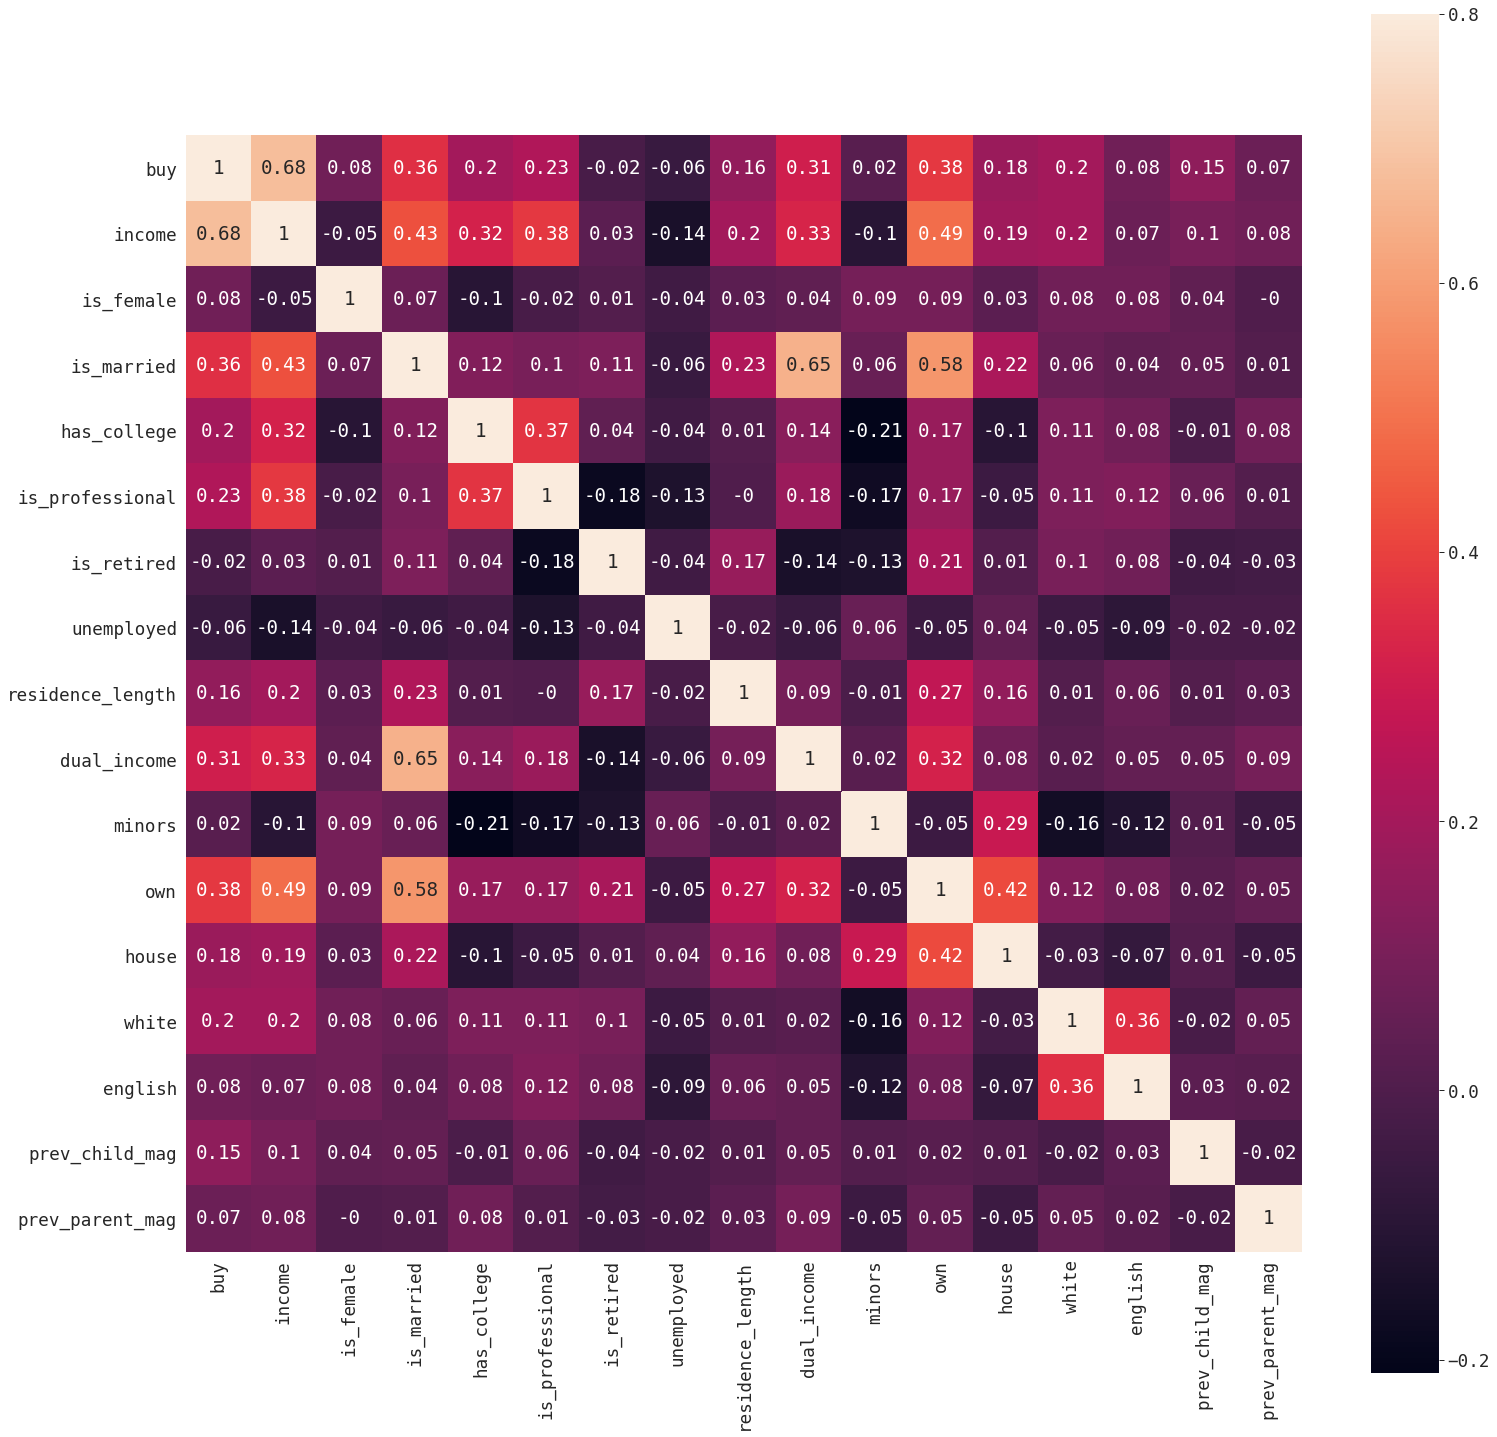

In [12]:
df_corr = df.corr().round(2)
sns.set(context="paper", font="monospace", font_scale=2)
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df_corr, vmax=.8, square=True, annot=True);

Strong correlation between dual_income and is_married, and house and own, and income and own.

In [13]:
df_feat = df[high_corr_feat]
df_goal = df['buy']

In [19]:
# transform dataframe to numpy array
X = df_feat.to_numpy()
y = df_goal.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [21]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
y_pred = LogReg.predict(X_test)

In [24]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[158,   8],
       [  8,  28]])

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       166
           1       0.78      0.78      0.78        36

   micro avg       0.92      0.92      0.92       202
   macro avg       0.86      0.86      0.86       202
weighted avg       0.92      0.92      0.92       202

